In [274]:
import pandas as pd

In [275]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [276]:
df = pd.read_csv("Housing.csv")

In [277]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4.0,2,3.0,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4.0,4,4.0,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3.0,2,2.0,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500.0,4.0,2,2.0,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420.0,4.0,1,2.0,yes,yes,NaN,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000.0,2.0,1,1.0,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400.0,3.0,1,1.0,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620.0,2.0,1,1.0,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910.0,3.0,1,1.0,no,no,no,no,no,0,no,furnished


In [278]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [279]:
df.shape

(545, 13)

In [280]:
df.head

<bound method NDFrame.head of         price    area  bedrooms  bathrooms  stories mainroad guestroom  \
0    13300000  7420.0       4.0          2      3.0      yes        no   
1    12250000  8960.0       4.0          4      4.0      yes        no   
2    12250000  9960.0       3.0          2      2.0      yes        no   
3    12215000  7500.0       4.0          2      2.0      yes        no   
4    11410000  7420.0       4.0          1      2.0      yes       yes   
..        ...     ...       ...        ...      ...      ...       ...   
540   1820000  3000.0       2.0          1      1.0      yes        no   
541   1767150  2400.0       3.0          1      1.0       no        no   
542   1750000  3620.0       2.0          1      1.0      yes        no   
543   1750000  2910.0       3.0          1      1.0       no        no   
544   1750000  3850.0       3.0          1      2.0      yes        no   

    basement hotwaterheating airconditioning  parking prefarea  \
0         no              no             yes        2      yes   
1         no              no             yes        3       no   
2        yes              no              no        2      yes   
3        yes              no             yes        3      yes   
4        NaN              no             yes        2       no   
..       ...             ...             ...      ...      ...   
540      yes              no              no        2       no   
541       no              no              no        0       no   
542       no              no              no        0       no   
543       no              no              no        0       no   
544       no              no              no        0       no   

    furnishingstatus  
0          furnished  
1          furnished  
2     semi-furnished  
3          furnished  
4          furnished  
..               ...  
540      unfurnished  
541   semi-furnished  
542      unfurnished  
543        furnished  
544      unfurnished  

[545 rows x 13 columns]>

In [281]:
df.info


<bound method DataFrame.info of         price    area  bedrooms  bathrooms  stories mainroad guestroom  \
0    13300000  7420.0       4.0          2      3.0      yes        no   
1    12250000  8960.0       4.0          4      4.0      yes        no   
2    12250000  9960.0       3.0          2      2.0      yes        no   
3    12215000  7500.0       4.0          2      2.0      yes        no   
4    11410000  7420.0       4.0          1      2.0      yes       yes   
..        ...     ...       ...        ...      ...      ...       ...   
540   1820000  3000.0       2.0          1      1.0      yes        no   
541   1767150  2400.0       3.0          1      1.0       no        no   
542   1750000  3620.0       2.0          1      1.0      yes        no   
543   1750000  2910.0       3.0          1      1.0       no        no   
544   1750000  3850.0       3.0          1      2.0      yes        no   

    basement hotwaterheating airconditioning  parking prefarea  \
0         no              no             yes        2      yes   
1         no              no             yes        3       no   
2        yes              no              no        2      yes   
3        yes              no             yes        3      yes   
4        NaN              no             yes        2       no   
..       ...             ...             ...      ...      ...   
540      yes              no              no        2       no   
541       no              no              no        0       no   
542       no              no              no        0       no   
543       no              no              no        0       no   
544       no              no              no        0       no   

    furnishingstatus  
0          furnished  
1          furnished  
2     semi-furnished  
3          furnished  
4          furnished  
..               ...  
540      unfurnished  
541   semi-furnished  
542      unfurnished  
543        furnished  
544      unfurnished  

[545 rows x 13 columns]>

In [282]:
df.dtypes

price                 int64
area                float64
bedrooms            float64
bathrooms             int64
stories             float64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking               int64
prefarea             object
furnishingstatus     object
dtype: object

In [283]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,539.000000,543.000000,545.000000,543.000000,545.000000
mean,4.766729e+06,5126.870130,2.963168,1.286239,1.804788,0.693578
std,1.870440e+06,2159.433198,0.738083,0.502470,0.869011,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3577.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4510.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [284]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 61., 163., 139.,  89.,  46.,  25.,  13.,   4.,   1.,   4.]),
 array([ 1750000.,  2905000.,  4060000.,  5215000.,  6370000.,  7525000.,
         8680000.,  9835000., 10990000., 12145000., 13300000.]),
 <BarContainer object of 10 artists>)

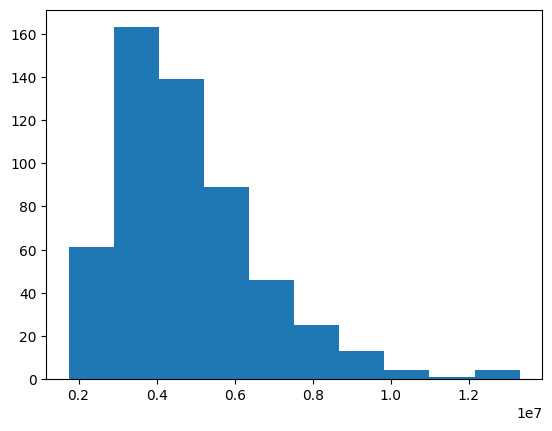

In [285]:
plt.hist(df['price'])

(array([ 73., 198., 115.,  86.,  38.,  15.,   7.,   5.,   0.,   2.]),
 array([ 1650.,  3105.,  4560.,  6015.,  7470.,  8925., 10380., 11835.,
        13290., 14745., 16200.]),
 <BarContainer object of 10 artists>)

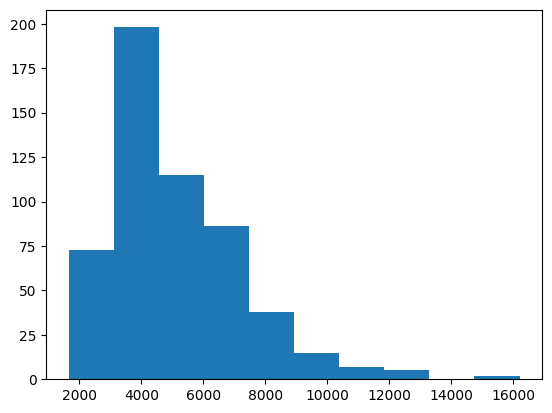

In [286]:
plt.hist(df['area'])

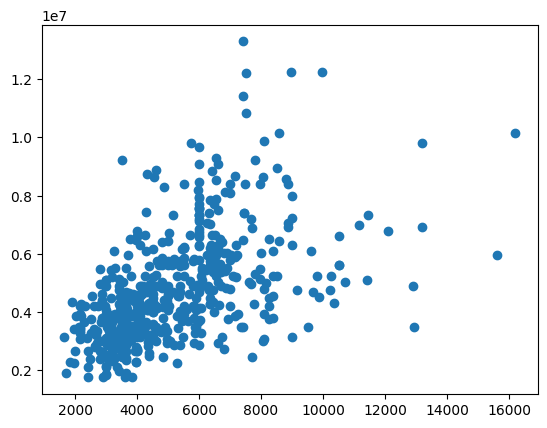

In [287]:
x=df['area']
y=df['price']
plt.scatter(x,y)

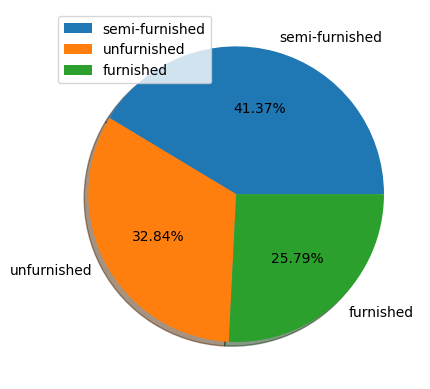

In [288]:
plt.pie(df.furnishingstatus.value_counts().values,labels=df.furnishingstatus.value_counts().index,shadow=True,autopct='%1.2f%%')
plt.legend()

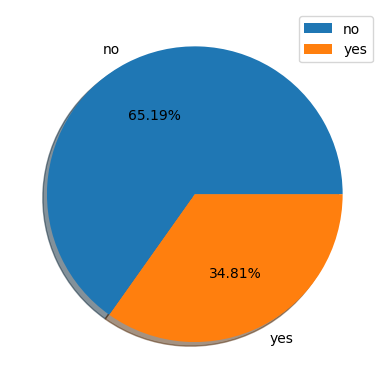

In [289]:
plt.pie(df.basement.value_counts().values,labels=df.basement.value_counts().index,shadow=True,autopct='%1.2f%%')
plt.legend()

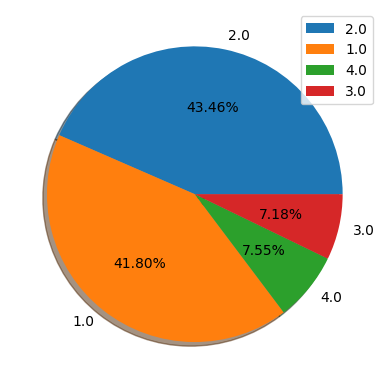

In [290]:
plt.pie(df.stories.value_counts().values,labels=df.stories.value_counts().index,shadow=True,autopct='%1.2f%%')
plt.legend()

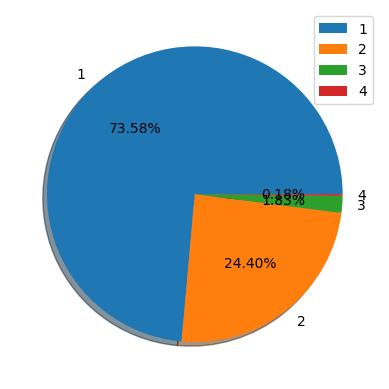

In [291]:
plt.pie(df.bathrooms.value_counts().values,labels=df.bathrooms.value_counts().index,shadow=True,autopct='%1.2f%%')
plt.legend()

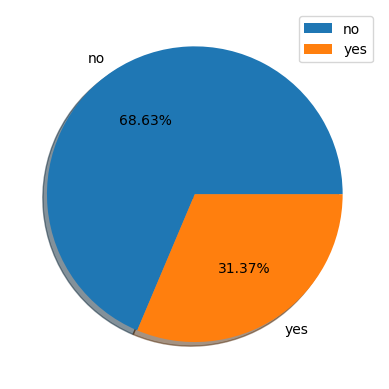

In [292]:
plt.pie(df.airconditioning.value_counts().values,labels=df.airconditioning.value_counts().index,shadow=True,autopct='%1.2f%%')
plt.legend()

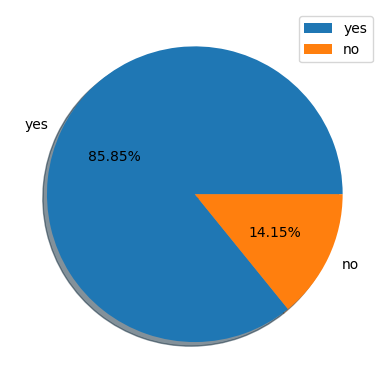

In [293]:
plt.pie(df.mainroad.value_counts().values,labels=df.mainroad.value_counts().index,shadow=True,autopct='%1.2f%%')
plt.legend()

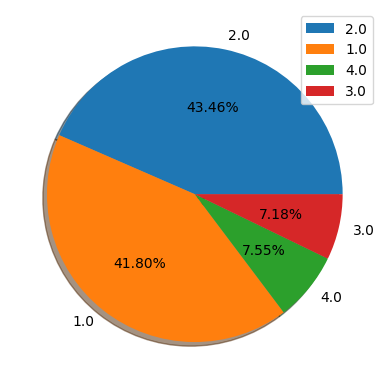

In [294]:
plt.pie(df.stories.value_counts().values,labels=df.stories.value_counts().index,shadow=True,autopct='%1.2f%%')
plt.legend()

<Axes: xlabel='price'>

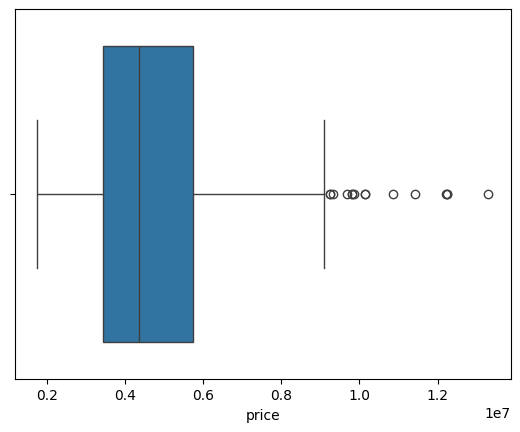

In [295]:
sns.boxplot(x='price',data=df)


<Axes: xlabel='area'>

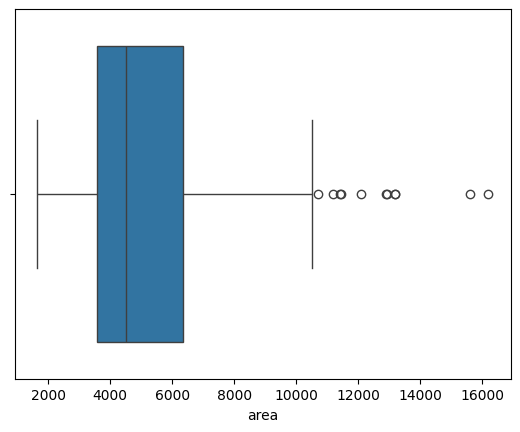

In [296]:
sns.boxplot(x='area',data=df)

In [297]:
print(df['price'].quantile(0.05))
print(df['price'].quantile(0.95))

2450000.0
8400000.0


In [298]:
df['price']=np.where(df['price']>8400000,8400000,df['price'])
df['price']=np.where(df['price']<2450000,2450000,df['price'])

<Axes: xlabel='price'>

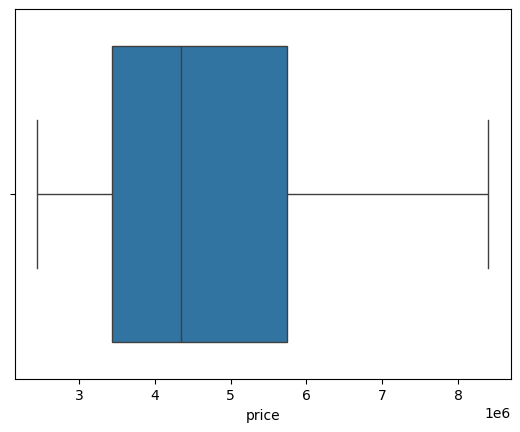

In [299]:
sns.boxplot(x='price',data=df)

In [300]:
df.isna().sum()

price               0
area                6
bedrooms            2
bathrooms           0
stories             2
mainroad            1
guestroom           0
basement            2
hotwaterheating     2
airconditioning     3
parking             0
prefarea            2
furnishingstatus    6
dtype: int64

In [301]:
x=df['area'].median()
y=df['price'].median()
print(x,y)

4510.0 4340000.0


In [302]:
df['area'].fillna(df['area'].median(),inplace=True)

In [303]:
df['mainroad'].fillna(df['mainroad'].mode()[0],inplace=True)

In [304]:
df['hotwaterheating'].fillna(df['hotwaterheating'].mode()[0],inplace=True)

In [305]:
df['bedrooms'].fillna(df['bedrooms'].mode()[0],inplace=True)

In [306]:
df['stories'].fillna(df['stories'].mode()[0],inplace=True)

In [307]:
df['airconditioning'].fillna(df['airconditioning'].mode()[0],inplace=True)

In [308]:
df['prefarea'].fillna(df['prefarea'].mode()[0],inplace=True)

In [309]:
df['furnishingstatus'].fillna(df['furnishingstatus'].mode()[0],inplace=True)

In [310]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            2
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [311]:
df['basement'].fillna(df['basement'].mode()[0],inplace=True)

In [312]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    float64
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    float64
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 55.5+ KB


In [314]:
# sns.heatmap(df.corr(),annot=True,annot_kws={'size':15},cmap="RdBu")
# plt.show()

In [315]:
#label encoing
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['mainroad']=label_encoder.fit_transform(df['mainroad'])

df['gurstroom']=label_encoder.fit_transform(df['guestroom'])

df['basement']=label_encoder.fit_transform(df['basement'])
df['prefarea']=label_encoder.fit_transform(df['prefarea'])
df['guestroom']=label_encoder.fit_transform(df['guestroom'])
df['furinshingstatus']=label_encoder.fit_transform(df['furnishingstatus'])
df['airconditioning']=label_encoder.fit_transform(df['airconditioning'])
df['hotwaterheating']=label_encoder.fit_transform(df['hotwaterheating'])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,gurstroom,furinshingstatus
0,8400000,7420.0,4.0,2,3.0,1,0,0,0,1,2,1,furnished,0,0
1,8400000,8960.0,4.0,4,4.0,1,0,0,0,1,3,0,furnished,0,0
2,8400000,9960.0,3.0,2,2.0,1,0,1,0,0,2,1,semi-furnished,0,1
3,8400000,7500.0,4.0,2,2.0,1,0,1,0,1,3,1,furnished,0,0
4,8400000,7420.0,4.0,1,2.0,1,1,0,0,1,2,0,furnished,1,0


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    float64
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    float64
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  545 non-null    object 
 13  gurstroom         545 non-null    int64  
 14  furinshingstatus  545 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 64.0+ KB


In [317]:
df['furinshingstatus']=label_encoder.fit_transform(df['furnishingstatus'])

In [318]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,gurstroom,furinshingstatus
0,8400000,7420.0,4.0,2,3.0,1,0,0,0,1,2,1,furnished,0,0
1,8400000,8960.0,4.0,4,4.0,1,0,0,0,1,3,0,furnished,0,0
2,8400000,9960.0,3.0,2,2.0,1,0,1,0,0,2,1,semi-furnished,0,1
3,8400000,7500.0,4.0,2,2.0,1,0,1,0,1,3,1,furnished,0,0
4,8400000,7420.0,4.0,1,2.0,1,1,0,0,1,2,0,furnished,1,0


In [319]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,gurstroom,furinshingstatus
0,8400000,7420.0,4.0,2,3.0,1,0,0,0,1,2,1,furnished,0,0
1,8400000,8960.0,4.0,4,4.0,1,0,0,0,1,3,0,furnished,0,0
2,8400000,9960.0,3.0,2,2.0,1,0,1,0,0,2,1,semi-furnished,0,1
3,8400000,7500.0,4.0,2,2.0,1,0,1,0,1,3,1,furnished,0,0
4,8400000,7420.0,4.0,1,2.0,1,1,0,0,1,2,0,furnished,1,0


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    float64
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    float64
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  545 non-null    object 
 13  gurstroom         545 non-null    int64  
 14  furinshingstatus  545 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 64.0+ KB


In [321]:
df['furnishingstatus']

0           furnished
1           furnished
2      semi-furnished
3           furnished
4           furnished
            ...      
540       unfurnished
541    semi-furnished
542       unfurnished
543         furnished
544       unfurnished
Name: furnishingstatus, Length: 545, dtype: object

In [322]:
df['furnishingstatus']=df['furnishingstatus'].map({'furnished':0,'semi-furnished':1,'unfurnished':2})

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    float64
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    float64
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  545 non-null    int64  
 13  gurstroom         545 non-null    int64  
 14  furinshingstatus  545 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 64.0 KB


In [324]:
df.nunique()


price               183
area                281
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
gurstroom             2
furinshingstatus      3
dtype: int64

In [325]:
df = df.drop('furnishingstatus', axis=1)

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    float64
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    float64
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  gurstroom         545 non-null    int64  
 13  furinshingstatus  545 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 59.7 KB


In [327]:
dataset=df.values

dataset

array([[8.40e+06, 7.42e+03, 4.00e+00, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       [8.40e+06, 8.96e+03, 4.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [8.40e+06, 9.96e+03, 3.00e+00, ..., 1.00e+00, 0.00e+00, 1.00e+00],
       ...,
       [2.45e+06, 3.62e+03, 2.00e+00, ..., 0.00e+00, 0.00e+00, 2.00e+00],
       [2.45e+06, 2.91e+03, 3.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.45e+06, 3.85e+03, 3.00e+00, ..., 0.00e+00, 0.00e+00, 2.00e+00]])

In [328]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
numeric_columns = [ 'price','area', 'bedrooms', 'stories']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [329]:
from sklearn.preprocessing import MinMaxScaler

# Example of normalizing binary categorical columns
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'gurstroom', 'furinshingstatus']
df[binary_columns] = MinMaxScaler().fit_transform(df[binary_columns])


In [330]:

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

y=df['price'];
X=df.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5042)




In [331]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [332]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.layer1 = nn.Linear(X_train_tensor.shape[1], 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.dropout(x)
        x = self.relu(self.layer3(x))
        x = self.dropout(x)
        x = self.layer4(x)
        return x

model = RegressionModel()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.unsqueeze(1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred, y_test_tensor.unsqueeze(1))
    print(f'Test Loss: {test_loss.item():.4f}')

    y_pred_np = y_pred.numpy()
    y_test_np = y_test_tensor.numpy()

    r2 = r2_score(y_test_np, y_pred_np)
    mae = mean_absolute_error(y_test_np, y_pred_np)
    mse = mean_squared_error(y_test_np, y_pred_np)
    rmse = mse ** 0.5

    print(f'R-squared score: {r2:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'Root Mean Squared Error: {rmse:.4f}')


Epoch [100/1000], Loss: 0.3584
Epoch [200/1000], Loss: 0.2639
Epoch [300/1000], Loss: 0.2273
Epoch [400/1000], Loss: 0.1736
Epoch [500/1000], Loss: 0.1818
Epoch [600/1000], Loss: 0.1698
Epoch [700/1000], Loss: 0.1298
Epoch [800/1000], Loss: 0.1336
Epoch [900/1000], Loss: 0.1227
Epoch [1000/1000], Loss: 0.1300
Test Loss: 0.2979
R-squared score: 0.6646
Mean Absolute Error: 0.4106
Mean Squared Error: 0.2979
Root Mean Squared Error: 0.5458


In [333]:

price_index = numeric_columns.index('price')


sample_input = X_test_tensor[0].unsqueeze(0)
predicted_price_standardized = model(sample_input).item()


predicted_price_original = scaler.inverse_transform([[predicted_price_standardized, 0, 0, 0]])[0][price_index]

print(f'Predicted price for sample input (original scale): {predicted_price_original}')


Predicted price for sample input (original scale): 6095242.871827777
